In [3]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='all')

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(news)

In [6]:
df = pd.DataFrame(news.data, columns=['text'])
df['categories'] = [news.target_names[index] for index in news.target]
df.head()

,text,categories
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,rec.sport.hockey
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,comp.sys.ibm.pc.hardware
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,talk.politics.mideast
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,comp.sys.ibm.pc.hardware
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,comp.sys.mac.hardware


In [7]:
data_train = fetch_20newsgroups(subset='train', categories=None,
                                remove=('headers', 'footers',       
                                'quotes'))
data_test = fetch_20newsgroups(subset='test', categories=None,
                               remove=('headers', 'footers', 
                               'quotes'))
X_train = data_train.data
y_train = data_train.target
X_test = data_test.data
y_test = data_test.target

In [8]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [9]:
from sklearn.naive_bayes import GaussianNB

In [10]:
classifier = GaussianNB()
classifier.fit(X_train.toarray(), y_train)

GaussianNB()

In [11]:
y_pred = classifier.predict(X_test.toarray())

In [12]:
from sklearn import metrics

In [13]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[120   2   0   5  18   2   2   5   4   4   4   4   2   2   9  62   8  16
   19  31]
 [  1 222   4  23  35  33   4   1   4   2   0  22   9   9  15   2   1   1
    1   0]
 [  3  63  27  95  64  52  15   1   1   4   2  16   9  16  14   5   1   0
    5   1]
 [  0  24   7 217  75  11  14   1   5   1   2   9  19   4   2   0   0   0
    1   0]
 [  0  25   2  37 230   7  15   7   3   6   3   7  20   7  10   0   3   0
    1   2]
 [  0  58   3  12  25 254   2   1   4   6   0  11   2   8   7   0   1   1
    0   0]
 [  1  15   0  39  52   8 199  15  12   5   4   5   9   9  10   0   1   4
    2   0]
 [  2   3   0   1  38   0  11 243  40   8   0   6  14   2  10   6   3   1
    8   0]
 [  8   1   0   1  27   1  10  55 232   8   4   4  10   2   4   1  10   6
    7   7]
 [  5   1   0   0  24   1   2   1   5 297  16   2   1   5   6   3   9   2
   15   2]
 [  5   2   0   1  15   0   5   5   2  14 327   2   2   2   2   1   3   6
    3   2]
 [ 11   4   0   5  29   3   2   5  14   4   4 248  11   5  11   3

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt
import  numpy as np


In [15]:
def plot_learning_curve(x_train, x_test, y_train_, y_test, model, name):
  # Создайте конвейер; Это будет передано в качестве оценки в метод кривой обучения
    pipeline = make_pipeline(StandardScaler(), model)

  # Используйте кривую обучения, чтобы получить результаты тренировок и тестов, а также размеры поездов
    train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=x_train, y=y_train,
    cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=1)

  # Рассчитайте среднее значение обучения и тестирования и std
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

  # Постройте кривую обучения
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title(f'Learning Curve of {name}')
    plt.xlabel('Training Data Size')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

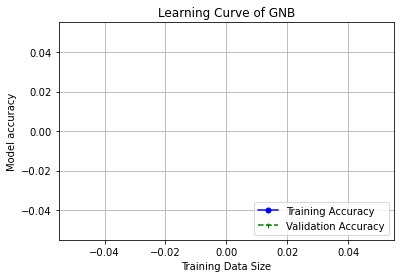

In [17]:
plot_learning_curve(X_train, X_test, y_train, y_test, classifier, 'GNB')

# Постройте модели классификации для данной задачи на основе следующих методов:
-логистическая регрессия (LogisticRegression);
-метод опорных векторов с гауссовым ядром (SVC);
-метод опорных векторов с полиномиальным ядром (SVC);
-метод k ближайших соседей (KNeighborsClassifier);
-многослойный перцептрон (MLP);
-другие методы по желанию;

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
%%time

cls = LogisticRegression()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
import time
time.sleep(1)
time.sleep(0.2)

cls

C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wall time: 44.9 s


LogisticRegression()

In [18]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[133   2   3   0   2   3   2   7   6  17   3   4   9  11  14  36  13   6
    6  42]
 [  3 247  20  11   8  24   9   7   3  15   3   2  14   4  12   1   1   1
    2   2]
 [  4  30 208  51  19  18   2   5   4  22   1   5   2   6   6   1   2   1
    5   2]
 [  2  17  41 228  27   4  12   3   2  10   3   1  37   1   1   0   1   0
    2   0]
 [  0  12  12  39 226   4  13  10   5  15   5   1  29   3   7   1   2   1
    0   0]
 [  1  53  34  11   3 246   5   4   2  17   0   3   5   0   5   2   0   4
    0   0]
 [  0   4   5  17  12   1 292  12   9  15   1   2  11   0   3   2   1   2
    0   1]
 [  9   1   1   3   1   0  11 261  20  34   2   2  21   3   6   1   4   2
   10   4]
 [  7   6   2   5   5   1   5  35 261  23   1   3  16   5   9   0   3   6
    4   1]
 [  7   3   0   0   3   0   3   7   8 300  33   0   4   4   7   5   2   4
    4   3]
 [  6   0   2   0   0   0   2   3   3  33 330   2   2   2   5   0   2   3
    4   0]
 [  4   7  11   4   6   2   4   5   7  27   3 246  18   5   9   2

In [19]:
from sklearn.svm import SVC

In [20]:
%%time

clr = SVC(kernel='rbf', random_state=True)
clr.fit(X_train, y_train)
y_pred = clr.predict(X_test)

import time
time.sleep(1)
time.sleep(0.2)

Wall time: 3min 24s


In [21]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[  0   0   0   0   0   0 197   0  69   1   0   4   0   7   0  36   0   5
    0   0]
 [  0   6   0   0   0   0 324   0  32   2   0  12   0   4   2   5   0   2
    0   0]
 [  0   0   1   1   0   0 323   0  57   2   0   6   0   0   0   1   0   3
    0   0]
 [  0   0   0   2   0   0 310   1  64   0   0  11   1   1   0   2   0   0
    0   0]
 [  0   0   1   1   0   0 321   1  52   1   0   6   0   0   0   1   0   1
    0   0]
 [  0   0   3   0   0   3 306   2  63   1   0  11   0   1   1   4   0   0
    0   0]
 [  0   0   0   0   0   0 377   0   6   0   0   3   0   2   0   2   0   0
    0   0]
 [  0   0   0   0   0   0 314   3  64   0   1   7   0   2   1   3   0   1
    0   0]
 [  0   0   0   0   0   0 316   0  67   0   0  10   0   0   1   4   0   0
    0   0]
 [  0   0   0   0   0   0 285   1  74  18   2   2   0   2   0  13   0   0
    0   0]
 [  0   0   0   0   0   0 275   0  93   9  12   2   0   3   0   5   0   0
    0   0]
 [  0   0   0   0   0   0 260   0  89   1   0  34   0   3   0   8

C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.svm import SVC

In [23]:
%%time

clm = SVC(kernel='poly', random_state=True)
clm.fit(X_train, y_train)
y_pred = clm.predict(X_test)
import time
time.sleep(1)
time.sleep(0.2)

Wall time: 2min 52s


In [24]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[  0   0   0   0   0   0   0   0 317   0   0   0   0   0   0   2   0   0
    0   0]
 [  0   5   0   0   0   0   0   0 383   0   0   1   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 392   0   0   0   0   0   0   1   0   1
    0   0]
 [  0   0   0   0   0   0   0   0 392   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 384   0   0   0   0   0   0   0   0   0
    0   1]
 [  0   0   0   0   0   2   0   0 391   0   0   0   0   1   0   0   0   0
    0   1]
 [  0   0   0   0   0   0   1   0 389   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 395   0   0   0   0   0   0   0   0   1
    0   0]
 [  0   0   0   0   0   0   0   0 398   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 397   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 399   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 395   0   0   0   0   0   0   0

C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
%%time

model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
y_pred
import time
time.sleep(1)
time.sleep(0.2)

Wall time: 5.78 s


In [27]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[101  15  20   6  19   4   3  16  11  15   5  12   2   7  11  32   5  17
    3  15]
 [ 36  91  50  27  26  27  15  17  13   7   8  12   7  10   7   6   5  13
    7   5]
 [ 55  64  82  25  31  19   5  22  14  18   4   8   2  16   7   2   2   6
    3   9]
 [ 33  59  49  70  52  13  10  15  16  14   5  10   5  18   5   6   3   4
    0   5]
 [ 54  36  51  43  67  16   8  24  15  12  10  11   5   4  11   3   3   3
    3   6]
 [ 29  66  61  21  21  72  11  23  12  17  11   8   5  10   8   5   2   5
    2   6]
 [ 32  58  20  28  30  12  99  25  21  10   6   4   2  11   5   2   5  14
    2   4]
 [ 69  39  35  19  45  17   8  54  23  21  14   6   3  15   3   4   6   9
    3   3]
 [ 52  33  47  15  41  12   5  44  53  19  11  10   3   8   9   2   5  19
    5   5]
 [ 62  30  22  19  21  13   8  27  18  71  27   1   3  14  12  16   4  15
    5   9]
 [ 39  26  30  13  33   9  11  30  24  43  92   6   1   4  10   6   3  11
    7   1]
 [ 59  39  29  19  24  21   6  27  29  13  13  57   2   5  12   9

In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
%%time

model2 = MLPClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
y_pred

import time
time.sleep(1)
time.sleep(0.2)

C:\Users\-\Downloads\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Wall time: 30min 25s


In [30]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[144   1   6   0   4   0   1  13   9   6   3  10   3   3   6  34   6   9
    8  53]
 [  4 249  22  18  13   9   4  13   5   6   0  16   7   7   6   0   1   0
    4   5]
 [  5  25 224  51  15   6   4  20   1   3   2   9   3   0   7   2   1   5
    5   6]
 [  2  13  30 259  25   4  11  10   1   1   2   3  27   2   1   1   0   0
    0   0]
 [  2   6  18  37 239   1  13  20   2   2   5   8  16   9   2   2   0   0
    2   1]
 [  3  55  49  21  11 206   5   5   2   2   0  15   2   5   8   0   2   2
    1   1]
 [  1   2   4  20  14   1 288  19   9   4   3   3  11   2   1   2   0   3
    1   2]
 [  4   2   7   6   5   1  14 283  14   4   3   3  14   3  10   3   0   5
   10   5]
 [  5   6  11   1   7   2   3  42 261  11   7   5   5   4   5   1   4   7
    7   4]
 [ 10   1   1   2   1   3   4  22   7 296  21   1   0   3   5   5   0   6
    5   4]
 [  7   1   2   1   4   0   0  14   7  24 318   4   1   0   1   2   0   3
    0  10]
 [  5   6   7   3   4   0   5  19   3   2   7 282  12   2   2   1

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt

In [35]:
def plot_learning_curve(x_train, x_test, y_train_, y_test, model, name, ax):
  # Создайте конвейер; Это будет передано в качестве оценки в метод кривой обучения
  pipeline = make_pipeline(StandardScaler(), model)

  # Используйте кривую обучения, чтобы получить результаты тренировок и тестов, а также размеры поездов
  train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=x_train, y=y_train,
  cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
  n_jobs=1)

  # Рассчитайте среднее значение обучения и тестирования и std
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Постройте кривую обучения
  ax.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  ax.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
  ax.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
  ax.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
  ax.set_title(f'Learning Curve of {name}')
  ax.set_xlabel('Training Data Size')
  ax.set_ylabel('Model accuracy')
  ax.grid()
  ax.legend(loc='lower right')


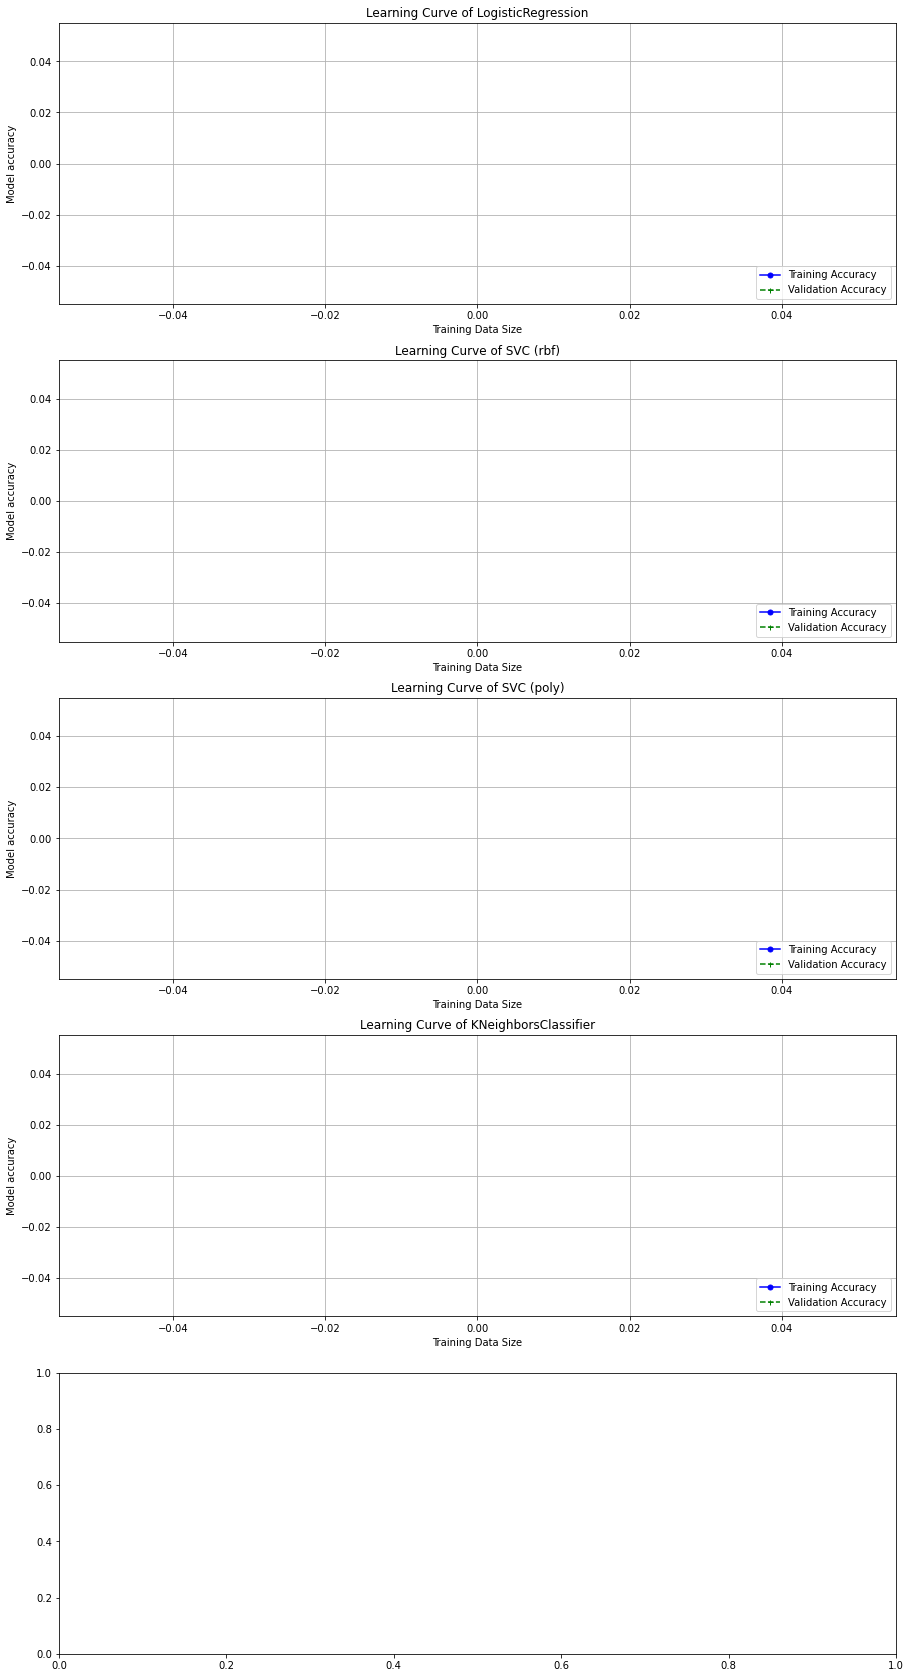

In [36]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(15, 30))

plot_learning_curve(X_train, X_test, y_train, y_test, cls, 'LogisticRegression', ax1)
plot_learning_curve(X_train, X_test, y_train, y_test, clr, 'SVC (rbf)', ax2)
plot_learning_curve(X_train, X_test, y_train, y_test, clm, 'SVC (poly)', ax3)
plot_learning_curve(X_train, X_test, y_train, y_test, model1, 'KNeighborsClassifier', ax4)
#plot_learning_curve(X_train, X_test, y_train, y_test, model2, 'MLPClassifier', ax5)